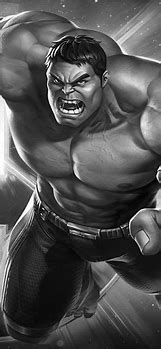

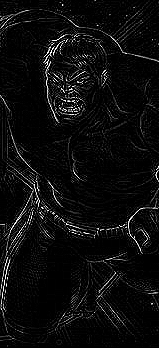

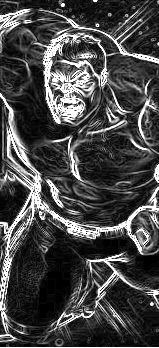

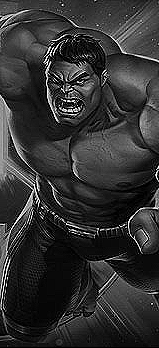

In [15]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Cargar la imagen
imagen = cv2.imread("/content/sample_data/hulk.jpeg", cv2.IMREAD_GRAYSCALE)
cv2_imshow(imagen)
# Máscaras de SobelX, SobelY y LoG
sobelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobely = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
laplacian = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]*1)


# Algoritmo de convolución discreta
def convolucion(imagen, mascara):
    altura, ancho = imagen.shape
    m_alto, m_ancho = mascara.shape
    bordes = int((m_alto - 1) / 2)
    imagen_bordes = np.zeros((altura - bordes*2, ancho - bordes*2))
    for i in range(bordes, altura-bordes):
        for j in range(bordes, ancho-bordes):
            trozo = imagen[i-bordes:i+bordes+1, j-bordes:j+bordes+1]
            imagen_bordes[i-bordes, j-bordes] = np.sum(trozo * mascara)
    return imagen_bordes

# Calcular el gradiente
gradiente_x = convolucion(imagen, sobelx)
gradiente_y = convolucion(imagen, sobely)
magnitud = np.sqrt(gradiente_x**2 + gradiente_y**2)

#Calcular el laplaciano
laplaciano = convolucion(imagen, laplacian)
cv2_imshow( laplaciano)

# Mostrar las imágenes original y resultado

cv2_imshow( magnitud)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Máscara de perfilado
perfilado = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])*0.6

# Aplicar el perfilado
perfilado_imagen = convolucion(imagen, perfilado)

# Mostrar la imagen resultado
cv2_imshow(perfilado_imagen)
cv2.waitKey(0)
cv2.destroyAllWindows()
